# INSTAGRAM NETWORK ANALYSIS

In [1]:
import pandas as pd
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df_filtered = pd.read_csv('datasets/bestfriendsgraph-following.csv',header = None)
print('shape:',df_filtered.shape)
print(df_filtered.isnull().sum())

shape: (464, 2)
0    0
1    5
dtype: int64


In [3]:
df_filtered.head()

,0,1
0,https://www.instagram.com/sleeper_cellz_of_psg,https://www.instagram.com/akil_yadhav
1,https://www.instagram.com/techy_trolls,https://www.instagram.com/akil_yadhav
2,https://www.instagram.com/projects_360_,https://www.instagram.com/akil_yadhav
3,https://www.instagram.com/_.b.k.g._,https://www.instagram.com/akil_yadhav
4,https://www.instagram.com/ajey729,https://www.instagram.com/akil_yadhav


In [4]:
df_filtered.dropna(inplace=True)

In [5]:
#creating edge set
edges_filtered = set()
for i in range(len(df_filtered[0])):
    edges_filtered.add((df_filtered[0][i],df_filtered[1][i]))
len(edges_filtered)

459

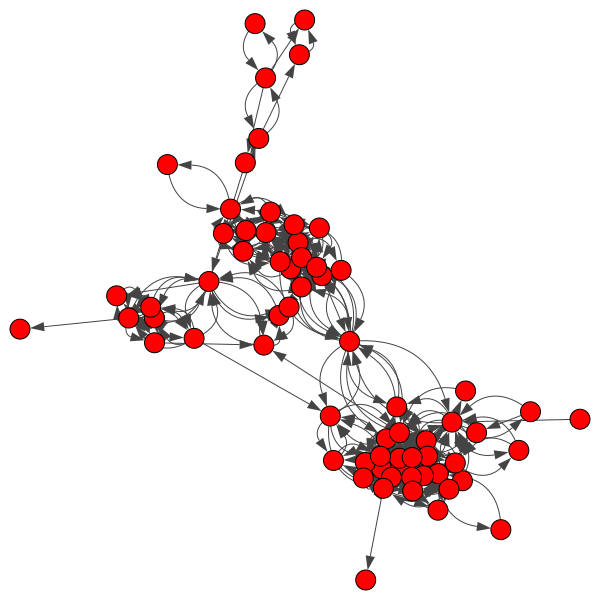

In [22]:
#creating graph with igraph
g_filtered = ig.Graph.TupleList(edges_filtered, directed = True)
ig.plot(g_filtered)

Name: 
Type: DiGraph
Number of nodes: 67
Number of edges: 459
Average in degree:   6.8507
Average out degree:   6.8507


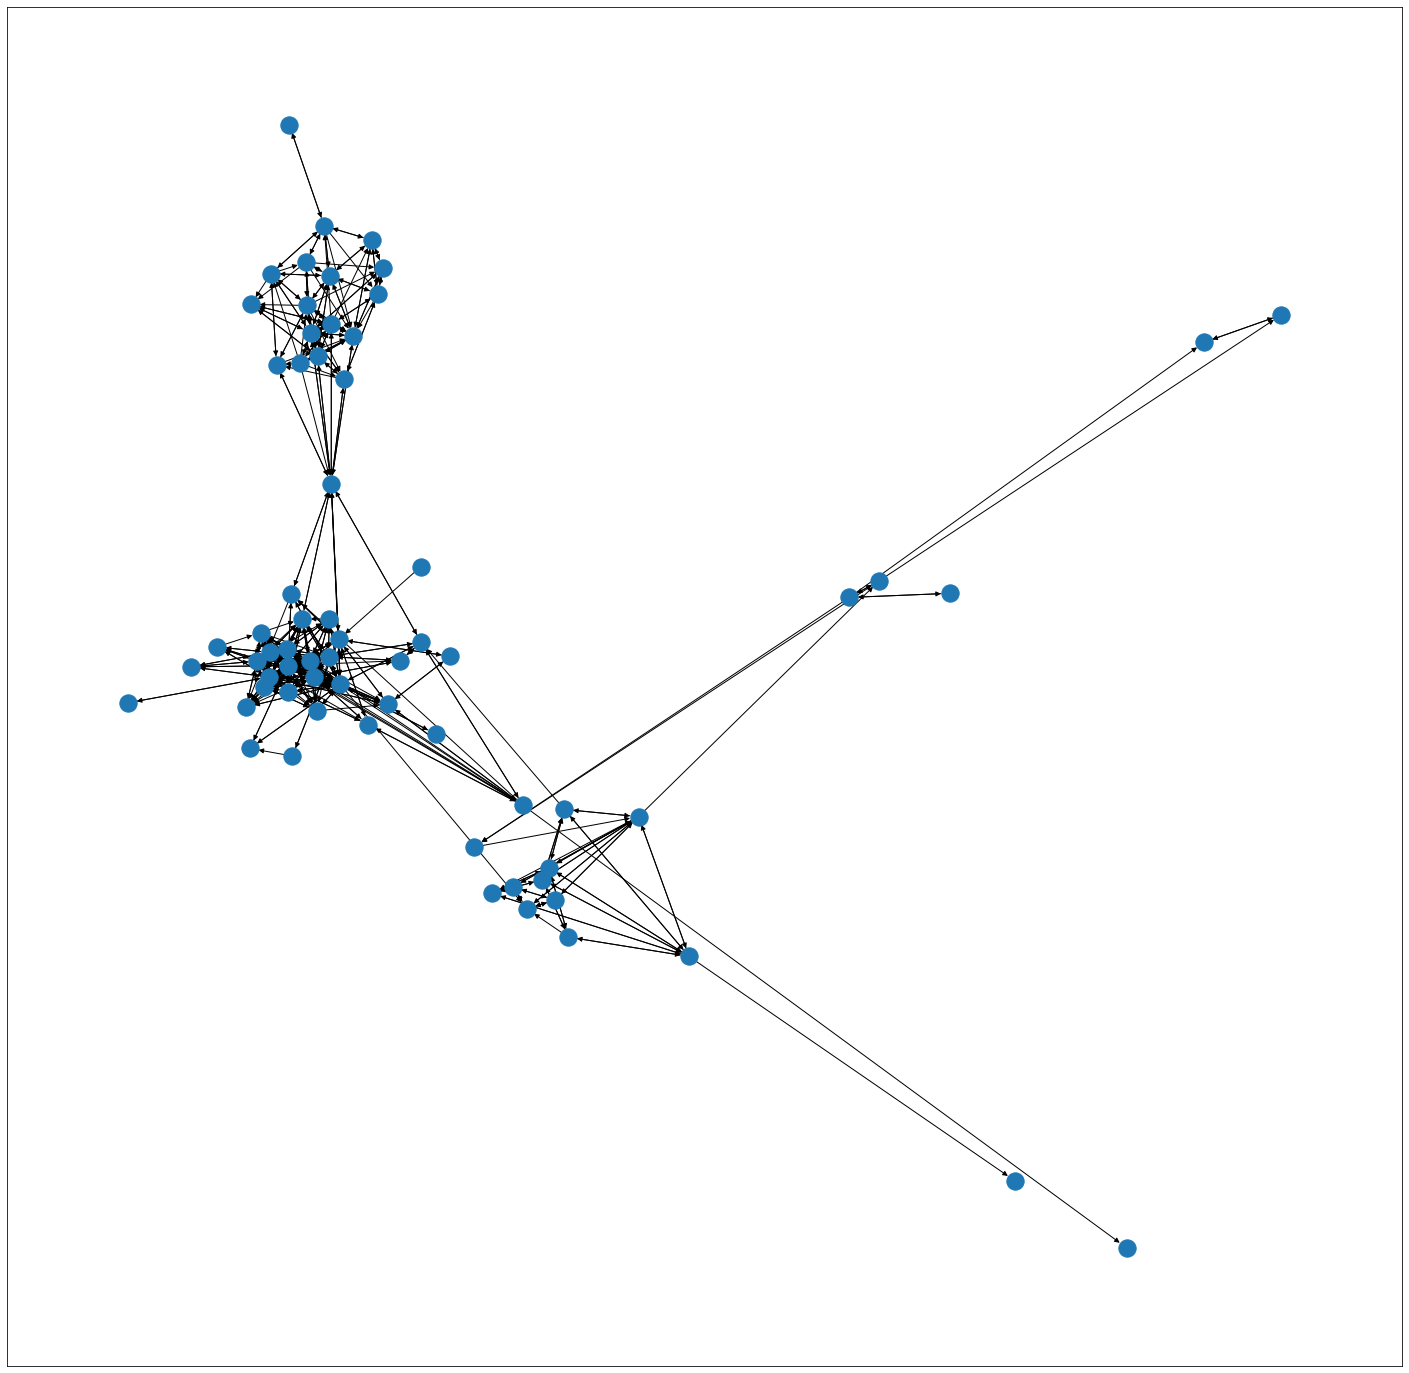

In [7]:
#creating networkx graph
g_nx = nx.DiGraph()
g_nx.add_edges_from(edges_filtered)
print(nx.info(g_nx))
plt.figure(figsize =(25, 25))
nx.draw_networkx(g_nx,with_labels=False)

## STRONGLY CONNECTED COMPONENTS & GIANT COMPONENT

In [8]:
NSCC = nx.number_strongly_connected_components(g_nx)
SCC = nx.strongly_connected_components(g_nx)
for i in SCC:
    print(i)
    


{'https://www.instagram.com/_pirate_10'}
{'https://www.instagram.com/newbharathschooltiruvarur'}
{'https://www.instagram.com/asridhar8', 'https://www.instagram.com/_dhavaseelan'}
{'https://www.instagram.com/__.v_.i_.s_.h_.n_.u__', 'https://www.instagram.com/ajay133734', 'https://www.instagram.com/__nanthu__', 'https://www.instagram.com/mrwirelessbrain', 'https://www.instagram.com/ghost_gopal_2.o', 'https://www.instagram.com/events_at_coimbatore', 'https://www.instagram.com/_.b.k.g._', 'https://www.instagram.com/rj_mokshith', 'https://www.instagram.com/_rishikeshwaran_', 'https://www.instagram.com/h_e_a_v_e_n_b_o_y_0001', 'https://www.instagram.com/__a.l.f.r.e.d', 'https://www.instagram.com/sanjay_sandy3', 'https://www.instagram.com/arunbarathdhon', 'https://www.instagram.com/terific_eswar', 'https://www.instagram.com/adhavanalexander', 'https://www.instagram.com/nitin_sundararaj', 'https://www.instagram.com/the_hacker_2.o', 'https://www.instagram.com/arunbarath53', 'https://www.instagr

NODES: 62
EDGES: 452


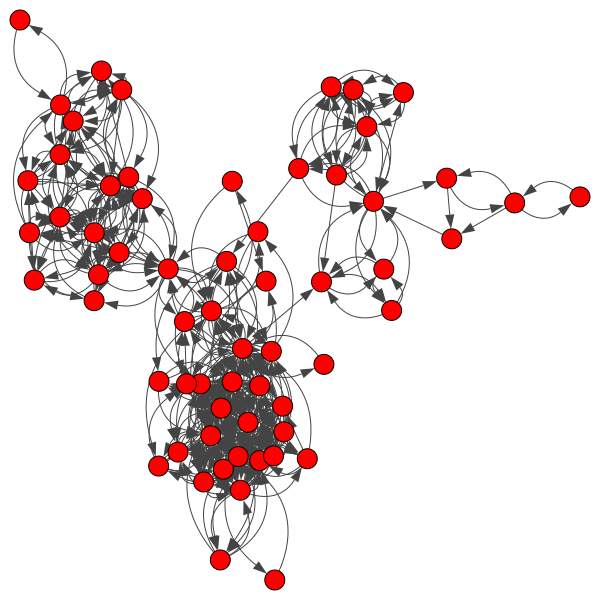

In [9]:
#Giant component
largest = g_filtered.clusters().giant()
print('NODES:',largest.vcount())
print('EDGES:',largest.ecount())
ig.plot(largest)

# AVERAGE PATH LENGTH

In [10]:
nx.average_shortest_path_length(g_nx)

3.2489823609226596

# GRIVEN NEWMAN COMMUNITY DETECTION

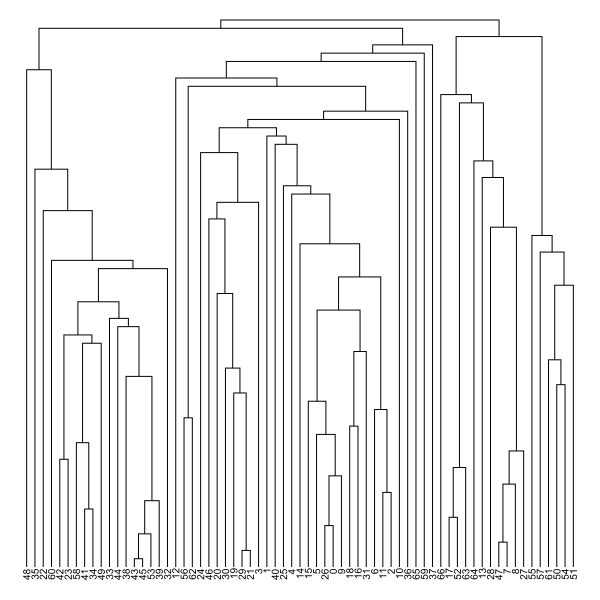

In [23]:
d_filtered = g_filtered.community_edge_betweenness()
ig.plot(d_filtered,orientation = 'bottom-top')

In [24]:
comm_filtered = d_filtered.as_clustering()
print(comm_filtered)

Clustering with 67 elements and 4 clusters
[0] https://www.instagram.com/the_hacker_2.o,
    https://www.instagram.com/ajay133734,
    https://www.instagram.com/rj_mokshith,
    https://www.instagram.com/akil_yadhav,
    https://www.instagram.com/sri_nagul_baskar,
    https://www.instagram.com/nitin_sundararaj,
    https://www.instagram.com/____preetham____,
    https://www.instagram.com/dhayanandh_at,
    https://www.instagram.com/sak_ajmal298,
    https://www.instagram.com/__the_lonely_king__,
    https://www.instagram.com/ajey729,
    https://www.instagram.com/___sallu___rocky___,
    https://www.instagram.com/ttrnni,
    https://www.instagram.com/_rishikeshwaran_,
    https://www.instagram.com/__.v_.i_.s_.h_.n_.u__,
    https://www.instagram.com/sleeper_cellz_of_psg,
    https://www.instagram.com/ilayaraja033,
    https://www.instagram.com/a_shibu_musical_official,
    https://www.instagram.com/an_engineer_sketch,
    https://www.instagram.com/mrwirelessbrain,
    https://www.insta

In [25]:
Q_filtered = g_filtered.modularity(comm_filtered)
print(Q_filtered)

0.5311727208433603


# HUBS AND AUTHORITIES

In [26]:
# hits function returns two dictionaries keyed by nodes containing hub scores and authority scores respectively.
hubs, authorities = nx.hits(g_nx, max_iter = 50, normalized = True)

h = []
for i in hubs:
    h.append([i,hubs[i]])
h.sort(reverse = True, key=lambda x:x[1])
print('HUBS:')
for i in h[:5]:
    print(i)
    
a = []
for i in authorities:
    a.append([i,authorities[i]])
a.sort(reverse = True, key=lambda x:x[1])
print('\nAUTHORITIES:')
for i in a[:5]:
    print(i)

HUBS:
['https://www.instagram.com/___sallu___rocky___', 0.06964798206262802]
['https://www.instagram.com/adhavanalexander', 0.06515167557089603]
['https://www.instagram.com/sri_nagul_baskar', 0.06373570038764931]
['https://www.instagram.com/dhayanandh_at', 0.06242001429308457]
['https://www.instagram.com/the_hacker_2.o', 0.05588062330873585]

AUTHORITIES:
['https://www.instagram.com/adhavanalexander', 0.06358619985513564]
['https://www.instagram.com/___sallu___rocky___', 0.060663249823140156]
['https://www.instagram.com/sri_nagul_baskar', 0.05820751253498343]
['https://www.instagram.com/__the_lonely_king__', 0.057163629028835226]
['https://www.instagram.com/_the_eminent_artist_', 0.05705508311712096]


# PAGE RANK

In [27]:
pr = nx.pagerank(g_nx)
pagerank = []
for i in pr:
    pagerank.append([i,pr[i]])
pagerank.sort(reverse = True, key = lambda x:x[1])
print('PANGERANK:')
for i in pagerank[:5]:
    print(i)

PANGERANK:
['https://www.instagram.com/___sallu___rocky___', 0.03917349293278592]
['https://www.instagram.com/adhavanalexander', 0.03442720172523205]
['https://www.instagram.com/rj_mokshith', 0.03081186839306167]
['https://www.instagram.com/lordboros2000', 0.0279750265612983]
['https://www.instagram.com/sri_nagul_baskar', 0.027565728948938394]


# CENTRALITY MEASURES

### Degree centrality

### Indegree Centrality

In [28]:
indegree = nx.in_degree_centrality(g_nx)
indegree_centrality = []
for i in indegree:
    indegree_centrality.append([i,indegree[i]])
indegree_centrality.sort(reverse = True, key = lambda x:x[1])
for i in indegree_centrality[:5]:
    print(i)

['https://www.instagram.com/___sallu___rocky___', 0.3181818181818182]
['https://www.instagram.com/adhavanalexander', 0.30303030303030304]
['https://www.instagram.com/rj_mokshith', 0.25757575757575757]
['https://www.instagram.com/sri_nagul_baskar', 0.25757575757575757]
['https://www.instagram.com/_the_eminent_artist_', 0.24242424242424243]


### Out degree centrality

In [29]:
outdegree = nx.out_degree_centrality(g_nx)
outdegree_centrality = []
for i in outdegree:
    outdegree_centrality.append([i,outdegree[i]])
outdegree_centrality.sort(reverse = True, key = lambda x:x[1])
for i in outdegree_centrality[:5]:
    print(i)

['https://www.instagram.com/___sallu___rocky___', 0.36363636363636365]
['https://www.instagram.com/adhavanalexander', 0.30303030303030304]
['https://www.instagram.com/sri_nagul_baskar', 0.2727272727272727]
['https://www.instagram.com/dhayanandh_at', 0.25757575757575757]
['https://www.instagram.com/rj_mokshith', 0.24242424242424243]


### Betweenness Centrality

In [30]:
betweenness = nx.betweenness_centrality(g_nx)
betweenness_centrality = []
for i in betweenness:
    betweenness_centrality.append([i,betweenness[i]])
betweenness_centrality.sort(reverse = True, key = lambda x:x[1])
for i in betweenness_centrality[:5]:
    print(i)

['https://www.instagram.com/_.b.k.g._', 0.3775208461572099]
['https://www.instagram.com/___sallu___rocky___', 0.37041778281288784]
['https://www.instagram.com/lordboros2000', 0.2594988344988345]
['https://www.instagram.com/ilayaraja033', 0.1839487477686778]
['https://www.instagram.com/sri_ram_aravind_sai', 0.18362470862470862]


### closeness centrality

In [31]:
closeness = nx.closeness_centrality(g_nx)
closeness_centrality = []
for i in closeness:
    closeness_centrality.append([i,closeness[i]])
closeness_centrality.sort(reverse = True, key = lambda x:x[1])
for i in closeness_centrality[:5]:
    print(i)

['https://www.instagram.com/___sallu___rocky___', 0.416017316017316]
['https://www.instagram.com/_.b.k.g._', 0.41306683859875354]
['https://www.instagram.com/ilayaraja033', 0.3962069676355391]
['https://www.instagram.com/sri_ram_aravind_sai', 0.35952113729891505]
['https://www.instagram.com/__the_lonely_king__', 0.35731548614984204]


# SUGGESTING USERS TO FOLLOW

In [32]:
df_following_merged = pd.read_csv('datasets/followingmerged.csv',header = None)
df_following_merged.head()

,0,1
0,https://www.instagram.com/sleeper_cellz_of_psg,https://www.instagram.com/sangavi_muthusamy
1,https://www.instagram.com/sleeper_cellz_of_psg,https://www.instagram.com/shreeja_nandiath
2,https://www.instagram.com/sleeper_cellz_of_psg,https://www.instagram.com/pari_poorani
3,https://www.instagram.com/sleeper_cellz_of_psg,https://www.instagram.com/___sam__walker___
4,https://www.instagram.com/sleeper_cellz_of_psg,https://www.instagram.com/_bhuvi26_


In [33]:
fof = list(df_following_merged[1])
fof_set = set(fof)
print(len(fof),len(fof_set))

53595 42275


In [34]:
df_following = pd.read_csv('users/following(ap).csv')
df_following.head()

,profileUrl,username,fullName,imgUrl,id,isPrivate,isVerified,followedByViewer,query,timestamp
0,https://www.instagram.com/kripaa_26,kripaa_26,Kripaa H,https://scontent-iad3-1.cdninstagram.com/v/t51...,39875446171,True,False,False,https://www.instagram.com/aruntrendzzz,2021-03-03T07:11:04.172Z
1,https://www.instagram.com/pikachoo._.22,pikachoo._.22,Lakshmi Pavithra,https://scontent-iad3-1.cdninstagram.com/v/t51...,45636694425,True,False,False,https://www.instagram.com/aruntrendzzz,2021-03-03T07:11:04.172Z
2,https://www.instagram.com/underdogcinemas,underdogcinemas,Underdog Cinemas,https://scontent-iad3-1.cdninstagram.com/v/t51...,45575626860,False,False,True,https://www.instagram.com/aruntrendzzz,2021-03-03T07:11:04.172Z
3,https://www.instagram.com/dhivya.kamalesh,dhivya.kamalesh,NaN,https://scontent-iad3-1.cdninstagram.com/v/t51...,39985415549,True,False,False,https://www.instagram.com/aruntrendzzz,2021-03-03T07:11:04.172Z
4,https://www.instagram.com/naveenkishore_29,naveenkishore_29,ꪀꪖꪜꫀꫀꪀ💞,https://scontent-iad3-1.cdninstagram.com/v/t51...,17621914347,True,False,False,https://www.instagram.com/aruntrendzzz,2021-03-03T07:11:04.172Z


In [35]:
df_following = df_following[['profileUrl']]
df_following.columns = ['profileUrl']
df_following.head()

,profileUrl
0,https://www.instagram.com/kripaa_26
1,https://www.instagram.com/pikachoo._.22
2,https://www.instagram.com/underdogcinemas
3,https://www.instagram.com/dhivya.kamalesh
4,https://www.instagram.com/naveenkishore_29


In [36]:
following_set = set(df_following['profileUrl'])
following_set.add('https://www.instagram.com/aruntrendzzz')
len(following_set)

419

In [37]:
fof_set = fof_set - following_set
len(fof_set)

41898

In [38]:
dict_following = {}
for i in fof_set:
    dict_following[i] = 0
    
for  i in fof:
    if i in dict_following:
        dict_following[i]+=1

following_freq_list = list(dict_following.items())
following_freq_list.sort(reverse = True,key = lambda x:x[1])

for i in following_freq_list[:10]:
    print(i)

('https://www.instagram.com/mahi7781', 23)
('https://www.instagram.com/rashmika_mandanna', 19)
('https://www.instagram.com/mokkamemes', 18)
('https://www.instagram.com/kp_1820', 18)
('https://www.instagram.com/akash_nambi_', 18)
('https://www.instagram.com/virat.kohli', 17)
('https://www.instagram.com/vigneshrajan05', 16)
('https://www.instagram.com/meghaakash', 16)
('https://www.instagram.com/vijaytelevision', 16)
('https://www.instagram.com/videomemes.vm', 16)
